# Import Libraries & DataSet

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn import metrics

In [142]:
data=sns.load_dataset("tips")

# Display First 5 rows and Last 5 rows

In [143]:
data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [144]:
data.tail(5)

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


Data Cleaning

# Total Rows & Columns

In [145]:
print(data.shape[0]) #Rows
print(data.shape[1]) #Columns

244
7


# Display Information about Dataset

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# How many weekdays are Present in dataset

In [147]:
data.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

# How many dinner and lunches and plot the curve

In [148]:
data["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

<AxesSubplot:>

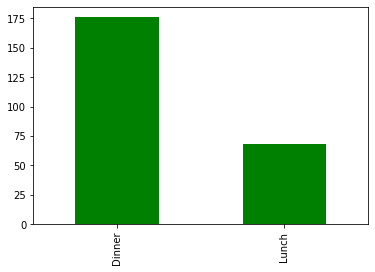

In [149]:
data["time"].value_counts().plot(kind="bar",color='g')

# What is the proportion of dinner and lunches in Percent (%)

In [150]:
data["time"].value_counts(normalize=True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

# When does people pay more tips and plot the curve

In [151]:
t=data.groupby("time")["tip"].mean().reset_index()
t

,time,tip
0,Lunch,2.728088
1,Dinner,3.102670


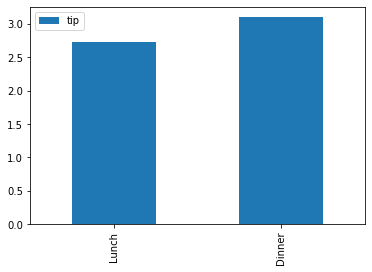

In [152]:
data.groupby("time")["tip"].mean().reset_index().plot.bar()
plt.xticks([0,1],["Lunch","Dinner"])
plt.show()

# Finding the Average of  smoker person will give the tip 

In [153]:
data.groupby("smoker")["tip"].mean().reset_index()

,smoker,tip
0,Yes,3.008710
1,No,2.991854


<AxesSubplot:xlabel='smoker'>

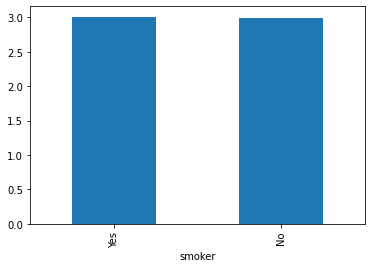

In [154]:
data.groupby("smoker")["tip"].mean().plot.bar()

# Find the Average  tip based on sex column  

In [155]:
data.groupby("sex")["tip"].mean().reset_index()

,sex,tip
0,Male,3.089618
1,Female,2.833448


<AxesSubplot:xlabel='sex'>

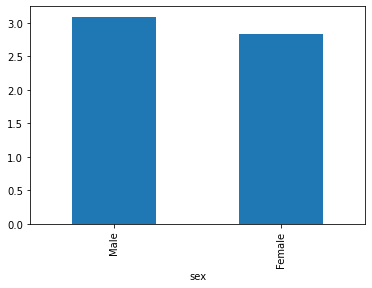

In [156]:
data.groupby("sex")["tip"].mean().plot.bar()

# Finding the average tip based on Day 

In [157]:
data.groupby("day")["tip"].mean().reset_index()

,day,tip
0,Thur,2.771452
1,Fri,2.734737
2,Sat,2.993103
3,Sun,3.255132


<AxesSubplot:xlabel='day'>

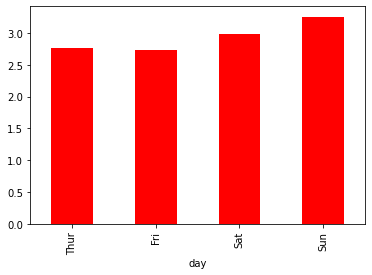

In [158]:
data.groupby("day")["tip"].mean().plot.bar(color='r')

# Null Values and plot them

In [159]:
data.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<AxesSubplot:>

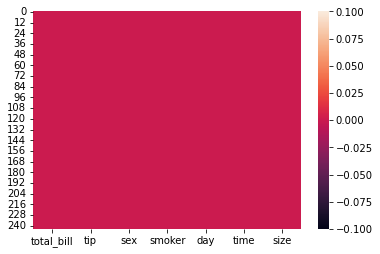

In [160]:
sns.heatmap(data.isna())

# Find skew of total Bill

In [161]:
print(data['total_bill'].skew())

1.1332130376158205


# Find Kurtosis

In [162]:
print(data['total_bill'].kurt())

1.2184840156638854


# Percentile

In [163]:

q1=data['total_bill'].quantile(0.25)
q2=data['total_bill'].quantile(0.5)
q3=data['total_bill'].quantile(0.75)

In [164]:
print(q1,q2,q3)

13.3475 17.795 24.127499999999998


# Interquartile Range

In [165]:
IQR=q3-q1
IQR

10.779999999999998

# Plot Normal Distribution Curve

Text(0.5, 0, 'Total Bill')

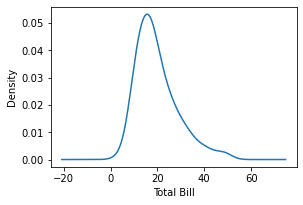

In [166]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
data['total_bill'].plot(kind='kde')
plt.xlabel("Total Bill")

# Find Correlation & Covariance

In [167]:
print("The covariances between the numerical variables in the Tips datasets are: \n" ,data.loc[:, ['total_bill','tip','sex','smoker','size']].cov())

print("\n The correlations between the numerical variables in the Tips datasets are: \n" ,data.loc[:, ['total_bill','tip','sex','smoker','size']].corr())


The covariances between the numerical variables in the Tips datasets are: 
             total_bill       tip      size
total_bill   79.252939  8.323502  5.065983
tip           8.323502  1.914455  0.643906
size          5.065983  0.643906  0.904591

 The correlations between the numerical variables in the Tips datasets are: 
             total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


# Scatter Plot between total bill and tip 

Text(0.5, 1.0, 'Total bill vs tip')

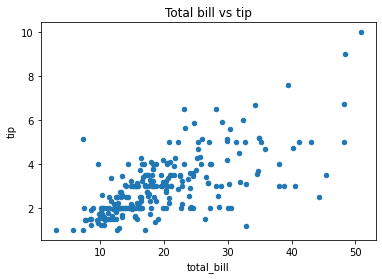

In [168]:
data.plot.scatter(x="total_bill",y="tip")
plt.title("Total bill vs tip")

# Tip given by male and female at lunch / Dinner

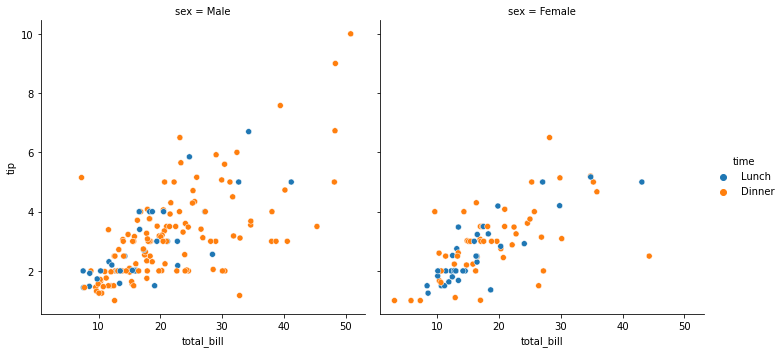

In [169]:
sns.relplot(x="total_bill",y="tip",hue="time",col="sex",data=data)

# Normal Distribution plot of total bill at Lunch/Dinner

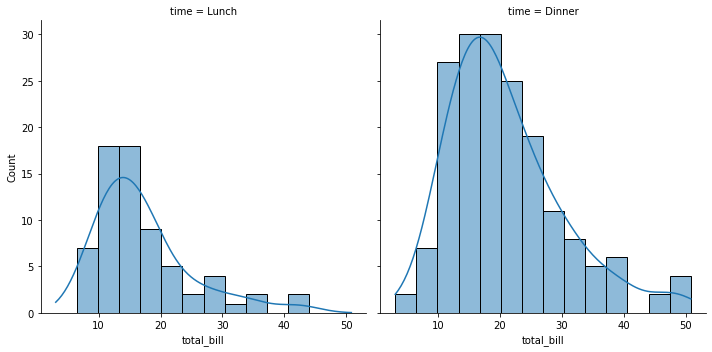

In [170]:
sns.displot(data=data,x="total_bill",col="time",kde=True)

# Creating Correlation distribution for all numeric variable by sex

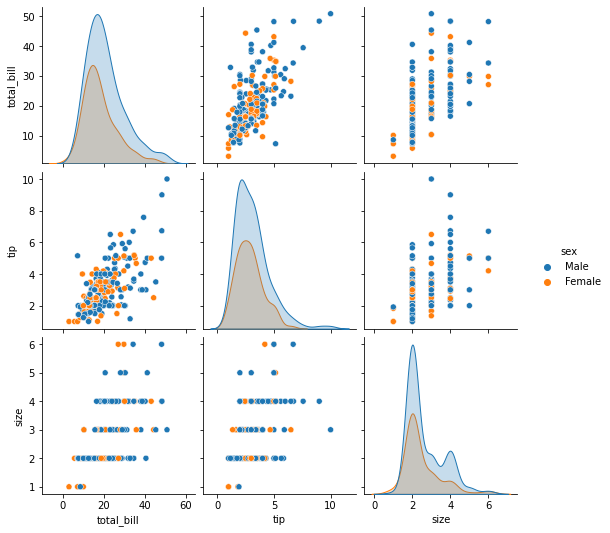

In [171]:
sns.pairplot(data=data,hue="sex")

# Add new column


In [172]:
data["tips_pot"]=data["tip"]/data["total_bill"]

In [173]:
data.head()

,total_bill,tip,sex,smoker,day,time,size,tips_pot
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


<AxesSubplot:xlabel='size', ylabel='tips_pot'>

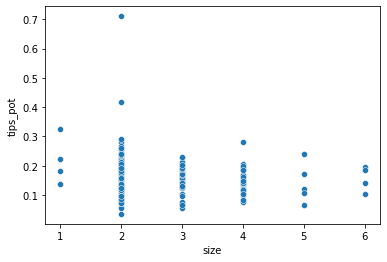

In [174]:
sns.scatterplot(x='size',y='tips_pot',data=data)

# Pivot Table

In [175]:

data.pivot_table(['tip'], index=['sex', 'smoker'], columns='size', aggfunc='count', fill_value=0)

tip                  
size            1   2   3   4  5  6
sex    smoker                      
Male   Yes      1  41   7   9  2  0
       No       0  57  17  19  2  2
Female Yes      1  25   5   2  0  0
       No       2  33   9   7  1  2

In [176]:
data.pivot_table(['tip'], index=['sex', 'smoker'], columns = 'size', fill_value=0)

tip                                          
size               1         2         3         4     5     6
sex    smoker                                                 
Male   Yes     1.920  2.692927  4.272857  3.981111  2.50  0.00
       No      0.000  2.557544  3.148824  4.262632  5.00  5.85
Female Yes     1.000  2.736800  3.846000  4.045000  0.00  0.00
       No      1.415  2.370606  2.918889  4.014286  5.14  4.60

# Delete a Column

In [177]:
data=data.drop(["tips_pot"],axis=1)

In [178]:
data.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


# Replace variables with Neumeric Data

In [179]:
data["sex"]=data["sex"].map({"Female":0,"Male":1})
data["smoker"]=data["smoker"].map({"Yes":1,"No":0})
data["time"]=data["time"].map({"Dinner":1,"Lunch":0})
data["day"] = data["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})


In [180]:
data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [181]:
data.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# Declare x & y

In [182]:
x=data.drop(["tip"],axis=1)
y=data["tip"]

In [183]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=730)

# Linear Regression

In [184]:
r=LinearRegression()

In [185]:
r.fit(x_train,y_train)

LinearRegression()

# R^2 value for train set and test det

In [186]:
r.score(x_train,y_train)

0.48583030574903674

In [187]:
r.fit(x_test,y_test)

LinearRegression()

In [188]:
r.score(x_test,y_test)

0.3892080634736984

# Predicted Value

In [189]:
y1_pred=r.predict(x_train)
y2_pred=r.predict(x_test)

In [190]:
c=r.coef_
c

array([ 0.09150992, -0.0092817 , -0.33495392, -0.06741019,  0.26410982,
        0.10924575])

In [191]:
data_1=pd.DataFrame({"actual value":y_train,"predicted_value":y1_pred})
data_1.reset_index(drop=True)

,actual value,predicted_value
0,1.76,2.065757
1,3.41,3.579680
2,4.00,1.857552
3,1.50,2.579763
4,2.00,2.580856
...,...,...
190,5.00,4.759142
191,1.92,1.516395
192,2.00,3.897219
193,1.67,2.368554


In [192]:
data_2=pd.DataFrame({"actual value":y_test,"predicted_value":y2_pred})
data_2.reset_index(drop=True)

,actual value,predicted_value
0,5.92,4.137918
1,3.18,3.884366
2,3.00,2.521300
3,2.00,1.773103
4,3.00,3.234798
5,2.01,3.223385
6,3.35,3.371065
7,2.00,1.854109
8,3.06,2.580378
9,2.00,2.906633


In [193]:
f1=f_regression(x_train,y_train)
f2=f_regression(x_test,y_test)
p1=f1[1].round(3)
p2=f2[1].round(3)
data_pred=pd.DataFrame({"columns":x.columns.values,"coefficients":c,"p_values using train model":p1,"p_values using test model":p2})
data_pred

,columns,coefficients,p_values using train model,p_values using test model
0,total_bill,0.091510,0.000,0.000
1,sex,-0.009282,0.493,0.049
2,smoker,-0.334954,0.892,0.971
3,day,-0.067410,0.066,0.279
4,time,0.264110,0.136,0.179
5,size,0.109246,0.000,0.005


# Tip Prediction

In [194]:
# features = [[total_bill, "sex", "smoker", "day", "time", "size"]]
features = np.array([[24.50, 1, 0, 0, 1, 4]])
r.predict(features)

C:\Users\Manisha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.96744437])